In [2]:
print("hello")

hello


In [4]:
import pandas as pd

# Load real groceries dataset directly from GitHub
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/groceries.csv"
# Try reading with a different separator, like a semicolon, as it's common in some datasets.
# If that doesn't work, we might need to inspect the file content more closely to find the correct separator.
try:
    df_raw = pd.read_csv(url, sep=';')
except Exception as e:
    print(f"Error reading with semicolon separator: {e}")
    # If semicolon doesn't work, try another common separator like a tab
    try:
        df_raw = pd.read_csv(url, sep='\t')
    except Exception as e:
        print(f"Error reading with tab separator: {e}")
        # If tab doesn't work, try reading without a specified separator and let pandas try to infer
        try:
            df_raw = pd.read_csv(url)
        except Exception as e:
             print(f"Error reading with default separator: {e}")
             print("Could not automatically determine the correct separator. Please inspect the file content.")
        else:
            # Check first few rows if successful
            print("Successfully read with default separator.")
            display(df_raw.head())
    else:
        # Check first few rows if successful
        print("Successfully read with tab separator.")
        display(df_raw.head())
else:
    # Check first few rows if successful
    print("Successfully read with semicolon separator.")
    display(df_raw.head())

Successfully read with semicolon separator.


,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese ,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"


In [5]:
from mlxtend.preprocessing import TransactionEncoder

# Split each row into a list of items
transactions = df_raw.iloc[:, 0].apply(lambda x: x.strip().split(',')).tolist()

# Encode the transactions into a one-hot format
te = TransactionEncoder()
te_array = te.fit_transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()



,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [6]:
from mlxtend.frequent_patterns import apriori, association_rules

# STEP 3: Find frequent itemsets with minimum support
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

# STEP 4: Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Show top 10 rules by lift
rules.sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
117,(root vegetables),"(whole milk, other vegetables)",0.109010,0.074842,0.023185,0.212687,2.841793,1.0,0.015026,1.175082,0.727403,0.144304,0.148995,0.261235
116,"(whole milk, other vegetables)",(root vegetables),0.074842,0.109010,0.023185,0.309783,2.841793,1.0,0.015026,1.290884,0.700540,0.144304,0.225337,0.261235
70,(tropical fruit),(pip fruit),0.104942,0.075656,0.020439,0.194767,2.574386,1.0,0.012500,1.147922,0.683261,0.127619,0.128861,0.232464
71,(pip fruit),(tropical fruit),0.075656,0.104942,0.020439,0.270161,2.574386,1.0,0.012500,1.226378,0.661613,0.127619,0.184591,0.232464
119,(other vegetables),"(root vegetables, whole milk)",0.193512,0.048912,0.023185,0.119811,2.449521,1.0,0.013720,1.080550,0.733746,0.105751,0.074545,0.296912
114,"(root vegetables, whole milk)",(other vegetables),0.048912,0.193512,0.023185,0.474012,2.449521,1.0,0.013720,1.533283,0.622189,0.105751,0.347805,0.296912
51,(other vegetables),(root vegetables),0.193512,0.109010,0.047387,0.244877,2.246376,1.0,0.026292,1.179927,0.687969,0.185731,0.152490,0.339789
50,(root vegetables),(other vegetables),0.109010,0.193512,0.047387,0.434701,2.246376,1.0,0.026292,1.426658,0.622721,0.185731,0.299061,0.339789
125,(yogurt),"(whole milk, other vegetables)",0.139516,0.074842,0.022270,0.159621,2.132762,1.0,0.011828,1.100881,0.617239,0.115934,0.091637,0.228588
120,"(whole milk, other vegetables)",(yogurt),0.074842,0.139516,0.022270,0.297554,2.132762,1.0,0.011828,1.224983,0.574091,0.115934,0.183662,0.228588


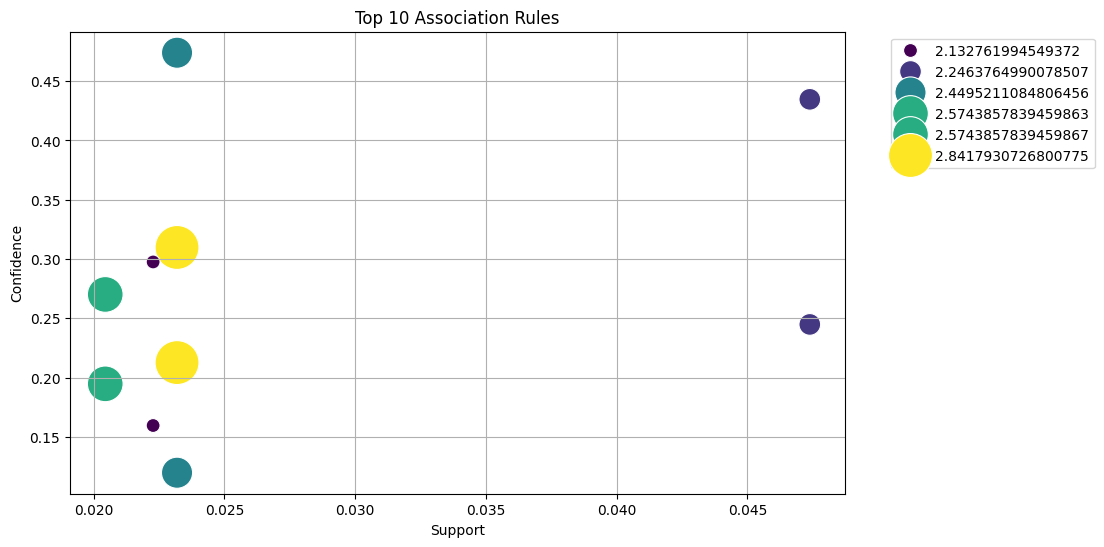

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort top 10 by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Plot lift vs confidence
plt.figure(figsize=(10,6))
sns.scatterplot(data=top_rules, x='support', y='confidence', size='lift', hue='lift', sizes=(100, 1000), palette='viridis')
plt.title('Top 10 Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Add a Markdown cell summarizing your findings, like this:

📌 Key Insights
Root vegetables → Whole milk + other vegetables is the strongest rule with a lift of 2.84.

Tropical fruit → Pip fruit shows strong correlation with 2.57 lift — consider bundling or combo discounts.

Yogurt → Whole milk + vegetables suggests dairy-focused baskets — a potential segment for targeted marketing.

🧠 Business Recommendations
Store Placement: Place root vegetables, milk, and fresh produce near each other.

Cross-sell Campaigns: Offer combo packs or discounts on common bundles (e.g., “Buy 2 get 1” on tropical fruits and pip fruits).

Targeted Offers: Send coupons to yogurt buyers for discounts on vegetables.

In [1]:
# Top 10 most frequently bought items
item_support = df_encoded.sum().sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=item_support.values, y=item_support.index, palette="viridis")
plt.title("Top 10 Most Frequently Bought Items")
plt.xlabel("Number of Transactions")
plt.ylabel("Items")
plt.grid(True)
plt.show()


NameError: name 'df_encoded' is not defined

In [3]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Load dataset again (in case runtime was reset)
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/groceries.csv"
df_raw = pd.read_csv(url, sep=';')

# Split comma-separated items into list
transactions = df_raw.iloc[:, 0].apply(lambda x: x.strip().split(',')).tolist()

# Encode with TransactionEncoder
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

df_encoded.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [4]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


/tmp/ipython-input-5-3766887094.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_support.values, y=item_support.index, palette="viridis")


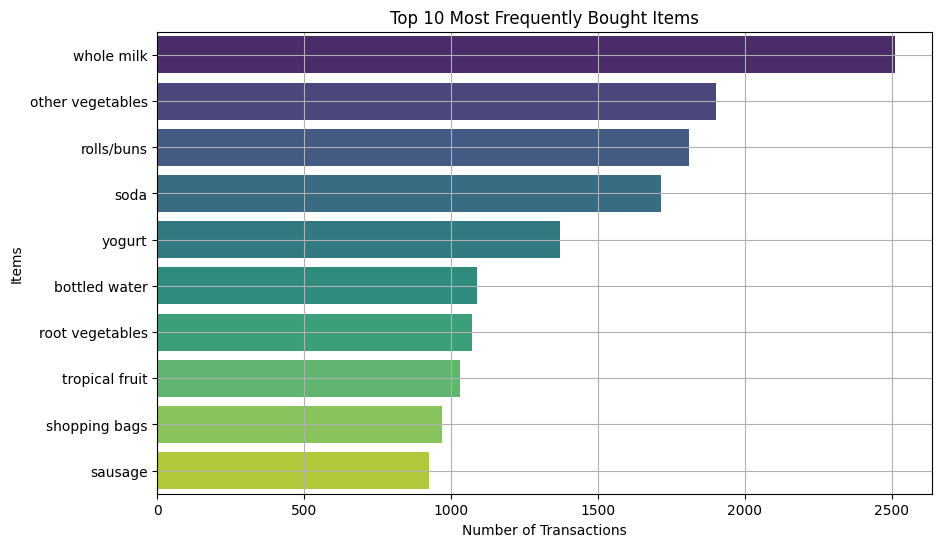

In [5]:
# Top 10 most frequently bought items
item_support = df_encoded.sum().sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=item_support.values, y=item_support.index, palette="viridis")
plt.title("Top 10 Most Frequently Bought Items")
plt.xlabel("Number of Transactions")
plt.ylabel("Items")
plt.grid(True)
plt.show()


In [6]:
# Top 10 rules by Lift
top_lift = rules.sort_values(by="lift", ascending=False).head(10)

# Top 10 rules by Confidence
top_conf = rules.sort_values(by="confidence", ascending=False).head(10)

# Display both
print("🔝 Top 10 Rules by Lift:\n", top_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
print("\n🔝 Top 10 Rules by Confidence:\n", top_conf[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


🔝 Top 10 Rules by Lift:
                         antecedents                     consequents   support  \
118               (root vegetables)  (other vegetables, whole milk)  0.023185   
115  (other vegetables, whole milk)               (root vegetables)  0.023185   
70                 (tropical fruit)                     (pip fruit)  0.020439   
71                      (pip fruit)                (tropical fruit)  0.020439   
116   (root vegetables, whole milk)              (other vegetables)  0.023185   
117              (other vegetables)   (root vegetables, whole milk)  0.023185   
51                (root vegetables)              (other vegetables)  0.047387   
50               (other vegetables)               (root vegetables)  0.047387   
125                        (yogurt)  (other vegetables, whole milk)  0.022270   
120  (other vegetables, whole milk)                        (yogurt)  0.022270   

     confidence      lift  
118    0.212687  2.841793  
115    0.309783  2.841793  

In [8]:
import plotly.express as px

# Convert frozensets to strings for plotting
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))


fig = px.scatter(rules, x='support', y='confidence', size='lift',
                 color='lift', hover_data=['antecedents_str', 'consequents_str'],
                 title='Association Rule Strength')
fig.show()

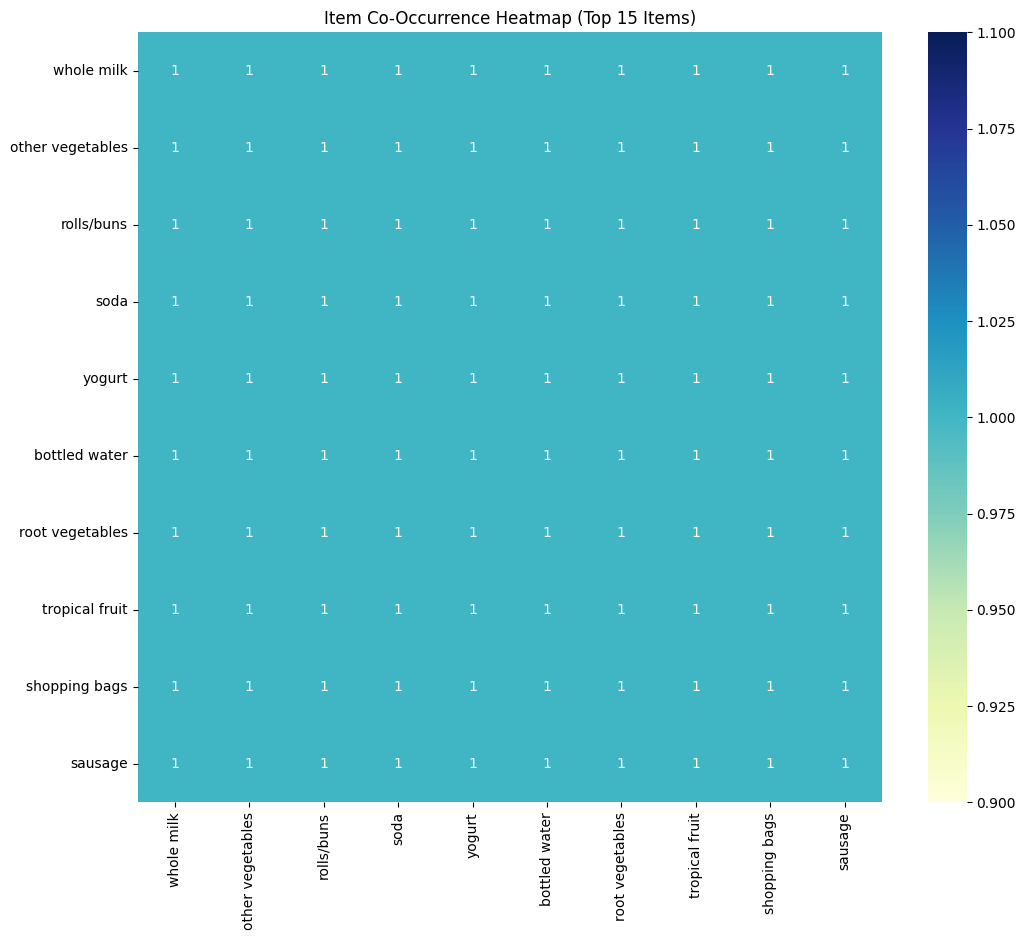

In [9]:
# Recompute item co-occurrence matrix
import numpy as np

co_matrix = np.dot(df_encoded.T.values, df_encoded.values)
co_df = pd.DataFrame(co_matrix, index=df_encoded.columns, columns=df_encoded.columns)

# Optional: Limit to top 15 items to keep heatmap readable
top_items = item_support.head(15).index.tolist()
co_df_small = co_df.loc[top_items, top_items]

plt.figure(figsize=(12,10))
sns.heatmap(co_df_small, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Item Co-Occurrence Heatmap (Top 15 Items)")
plt.show()


In [12]:
# Export for Streamlit dashboard
rules.to_csv("rules.csv", index=False)
item_support.to_csv("top_items.csv", header=["support"])
frequent_itemsets.to_csv("frequent_itemsets.csv", index=False)


In [13]:
import os
os.listdir()


['.config',
 'rules.csv',
 'frequent_itemsets.csv',
 'top_items.csv',
 'sample_data']

In [14]:
from google.colab import files
files.download("rules.csv")
files.download("top_items.csv")
files.download("frequent_itemsets.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>